## <center>Propreturns Data Science Internship Assignment</center>
### <center>Web Scraping</center>
### <center>By:- Malhar Jadhav</center>


#### To-Do
Scrape the following Delhi Government website for Real Estate data using Selenium - 
https://esearch.delhigovt.nic.in/Complete_search.aspx

You may use the following inputs - <br>
<h7>SRO: Central -Asaf Ali (SR III)</h7><br>
Locality: All localities</h7><br>
Registration Year: 2021-2022</h7><br>

#### Importing the required Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from time import sleep

driver = webdriver.Chrome(executable_path=r"D:/Malhar H Jadhav/Devlopment/chromedriver.exe")
driver.get("http://esearch.delhigovt.nic.in/Complete_search.aspx")

Select(driver.find_element( By.ID, "ctl00_ContentPlaceHolder1_ddl_sro_s")).select_by_visible_text("Central -Asaf Ali (SR III)")
sleep(2)

location_select = Select(driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_ddl_loc_s"))
locations = [location.text for location in location_select.options if location.text != "-Select All-"]
del locations[0]

driver.quit()

C:\Users\harsh\AppData\Local\Temp\ipykernel_17576\1526894683.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"D:/Malhar H Jadhav/Devlopment/chromedriver.exe")


**`Observation:`** Above code will help us to get all locations present in Central Asaf Ali (SR III)

In [2]:
locations

['Abul Fazal Enclave*',
 'Adarsh Nagar*',
 'Ahata kidara*',
 'Ajmal Khan Road',
 'Ajmeri Gate',
 'Alipur Road*',
 'Alipur*',
 'Amarpuri*',
 'Amrit Kaur Puri',
 'Anand Niketan*',
 'Andrews Ganj*',
 'Anna Nagar (Minto Road)',
 'Anoop Nagar*',
 'Ansari Nagar*',
 'Arakarshana Road',
 'Aram Bagh',
 'Aram Nagar',
 'Arjun Nagar*',
 'Arya Nagar (Pahar Ganj)',
 'Arya Nagar*',
 'Arya Samaj Road',
 'Asaf Ali Road',
 'Ashok Nagar*',
 'Ashok Vihar*',
 'Ashoka Pahari (Manakpura )',
 'Ashram*',
 'Asola*',
 'Badarpur*',
 'Baggichi Madhodas (Jama Masjid)',
 'Bagh Raoji Colony (Manakpura)',
 'Bagh Raoji*',
 'Bagichi Allauddin (Qadam Shariff)',
 'Bagichi Allauddin*',
 'Bahadur Shah Zafar Marg',
 'Bali Nagar*',
 'Baljeet Nagar*',
 'Balmiki Basti (Minto Road)',
 'Balmiki Colony (Dev Nagar)',
 'Bangali Market*',
 'Bapa Nagar',
 'Bara Hindu Rao*',
 'Baradari (Ballimaran)',
 'Basai Darapur*',
 'Basant Nagar*',
 'Basti Harphool Singh*',
 'Basti Julahan*',
 'Batla House*',
 'Bazar Lal Kuan*',
 'Bazar Sita Ram',

**`Observation:`** Here we can see the list for locations we have under Central Asaf Ali (SR III).

In [4]:
len(locations) # Lenghth Of location, we have 392 locations present.

392

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from time import sleep
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium.webdriver.chrome.service import Service


# Initialize the webdriver
driver = webdriver.Chrome(executable_path=r"D:/Malhar H Jadhav/Devlopment/chromedriver.exe")

# Loop through all locations
for i in locations:
    # Open the website and select SRO, locality, and year
    driver.get("http://esearch.delhigovt.nic.in/Complete_search.aspx")
    Select(driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_ddl_sro_s")).select_by_visible_text("Central -Asaf Ali (SR III)")
    sleep(1)
    Select(driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_ddl_loc_s")).select_by_visible_text(i)
    Select(driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_ddl_year_s")).select_by_visible_text("2021-2022")
    
    # Wait for user to manually enter captcha
    sleep(1)
    # Click the search button
    try:
        driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_btn_search_s").click()
    
    except ElementClickInterceptedException:
        continue
    # Check if data is available for this location
    try:
        tot_pages = driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_gv_search_ctl13_lblTotalNumberOfPages").get_attribute('innerHTML')
        tot_pages = int(tot_pages)
        cur_page = 1
    except NoSuchElementException:
        # If no data is available for this location, skip it and continue with the next location
        continue
    
    # Loop through all pages of the search results
    df = pd.DataFrame()
    while cur_page <= tot_pages:
        # Parse the table on the current page and add it to the dataframe
        soup = BeautifulSoup(driver.page_source, 'lxml')
        tables = soup.find_all('table')
        df_temp = pd.read_html(str(tables))[0]
        df_temp.drop(df_temp.tail(1).index, inplace=True)
        df = pd.concat([df, df_temp])
        
        # Click the "Next" button to go to the next page
        cur_page += 1
        if cur_page <= tot_pages:
            sleep(1)
            element = driver.find_element(By.ID, "ctl00_ContentPlaceHolder1_gv_search_ctl13_Button2")
            driver.execute_script("arguments[0].click();", element)
            sleep(2)
    
    
    
    
    
    # Save the data for this location to a CSV file
    df.to_csv(f"{i}.csv", index=False)


    
    
# Close the webdriver
driver.quit()


C:\Users\harsh\AppData\Local\Temp\ipykernel_2792\1367734829.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"D:/Malhar H Jadhav/Devlopment/chromedriver.exe")


**`Observation:`** So, here this code will iterate to all the location and if there's any data present it will stored it as a "Location.csv" and will go to next location. And, if there's no data present in next location it will just ignore and try for another location.

In [1]:
import pandas as pd
import os

# set the folder path where the CSV files are located
folder_path = r"D:\Malhar H Jadhav\Tasks\Propreturns\Location Wise Data"

# create an empty list to store all the dataframes
dfs = []

# loop through all the files in the folder
for file in os.listdir(folder_path):
    # check if the file is a CSV file
    if file.endswith(".csv"):
        # extract the location name from the filename
        location = file[:-4] # remove the .csv extension
        # read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(folder_path, file))
        # add a new column with the location name
        df["Location"] = location
        # append the dataframe to the list of dataframes
        dfs.append(df)

# concatenate all the dataframes into one
result = pd.concat(dfs)


**`Observation:`** Here, I'm combining all the DataFrames to one DataFrame.

In [3]:
result.isna().sum() / len(result)*100 # Checking for null

Reg.No              52.422089
Reg.Date            52.422089
First Party         52.422089
Second Party        52.422089
Property Address    52.422089
Area                52.422089
Deed Type           52.422089
Property Type       52.422089
Location             0.000000
dtype: float64

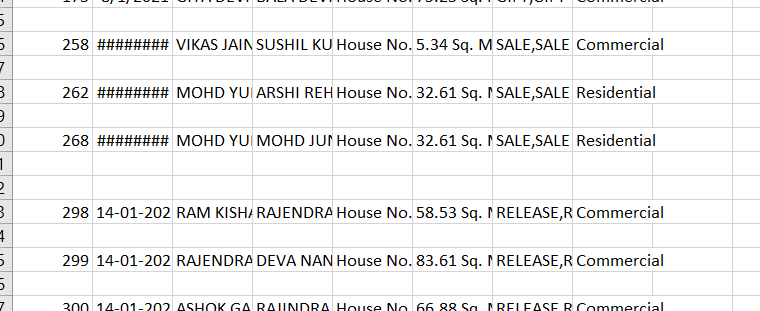

In [9]:
from IPython.display import Image
Image(filename='A.png')

Removing All the null values (Basically, they are not null values they are just extra rows Check above example we have a empty row after every value so removing it)

In [10]:
result=result.dropna(axis=0) 

In [11]:
result['Location'].unique() # Unique Locations Present in our Dataset.

array(['Ajmal Khan Road', 'Ajmeri Gate', 'Arakarshana Road',
       'Asaf Ali Road', 'Bahadur Shah Zafar Marg', 'Bapa Nagar',
       'Bazar Sita Ram', 'Beadon Pura', 'Chandni Mahal',
       'Delhi Gate Bazar', 'Dev Nagar', 'Dori Walan', 'Farash Khana',
       'G.B. Road', 'Hardhyan Singh Road', 'Hauz Quazi', 'Jama Masjid',
       'Jhandewalan', 'Joshi Road', 'Kala Mahal', 'Kamla Market',
       'Karol Bagh', 'Khalsa Nagar', 'Krishna Nagar', 'Lal Kuan',
       'Manak Pura', 'Mata Rameshwari Nagar', 'Multani Dhanda',
       'Nabi Karim', 'Nai Wala', 'New Rajinder Nagar',
       'Old Rajinder Nagar', 'Padam Singh Road', 'Pusa Road',
       'Rajendra Place', 'Rajinder Nagar', 'Rani Jhansi Road',
       'Reghar Pura', 'Sat Nagar', 'Siddi Pura', 'Subhash Nagar',
       'Sui Walan', 'Tiraha Behram Khan', 'Turkman Gate',
       'W.E.A. Karol Bagh'], dtype=object)

In [12]:
result['Location'].nunique()

45

In [13]:
result

,Reg.No,Reg.Date,First Party,Second Party,Property Address,Area,Deed Type,Property Type,Location
0,1096.0,11-02-2021,ADLAKHA ENTERPRISES TH SOHAN LAL ADLAKHA,VEDANT FASHIONS PVT LTD TH ANIL KUMAR SHARMA,"House No. 6/17-18,Ajmal Khan Road",18725 Sq. Feet,"LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial,Ajmal Khan Road
2,1097.0,11-02-2021,T K ARORA AND SONS AND OTHER TH VIJAY KUMAR ARORA,VEDANT FASHIONS PVT LTD TH ANIL KUMAR SHARMA,"House No. 6/18,Ajmal Khan Road",475 Sq. Feet,"LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial,Ajmal Khan Road
4,1187.0,12-02-2021,KAPIL KUMAR,AJITESH DUBEY,"House No. 5/53,Ajmal Khan Road",495 Sq. Feet,"LEASE,LEASE UPTO 5 YEARS",Commercial,Ajmal Khan Road
6,1359.0,16-02-2021,SHOBHA RANI MEHRA,SHIVALIK INTERNATIONAL TH ASHUTOSH BHUWALKA,"House No. 13/29-30,Ajmal Khan Road",450 Sq. Feet,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Commercial,Ajmal Khan Road
8,1605.0,23-02-2021,SINDHU BHALLA AND MUKESH KUMAR BHALLA,IIFL HOME FINANCE LIMITED TH ARJUN,"House No. 16-A/13 PLOT NO 13,Ajmal Khan Road",1950 Sq. Feet,"MORTGAGE,MORTGAGE WITHOUT POSSESSION",Residential,Ajmal Khan Road
...,...,...,...,...,...,...,...,...,...
2484,11563.0,31-12-2021,BHAGAT JI GARMENTS PVT LTD TH RITU GUPTA,MANMOON SINGH KALRA AND OTHERS,"House No. 10546,W.E.A. Karol Bagh",215.7 Sq. Meter,"SALE,SALE WITHIN MC AREA",Commercial,W.E.A. Karol Bagh
2486,11640.0,31-12-2021,MUKESH KUMAR GUPTA,AJIT SINGH,"House No. 13/2,W.E.A. Karol Bagh",66.92 Sq. Meter,"SALE,SALE WITHIN MC AREA",Commercial,W.E.A. Karol Bagh
2488,11719.0,31-12-2021,KANWALJIT KAUR,BIBHA DEVI,"House No. 10178,W.E.A. Karol Bagh",72 Sq. Meter,"SALE,SALE WITHIN MC AREA",Residential,W.E.A. Karol Bagh
2490,11725.0,31-12-2021,RAJESH WADHWA,CHHAYA WADHWA,"House No. C-3/43,W.E.A. Karol Bagh",131.26 Sq. Meter,"GIFT,GIFT WITH IN MC AREA",Residential,W.E.A. Karol Bagh


In [8]:
# save the combined dataframe to a new CSV file
result.to_csv("combined_data.csv", index=False)

**`Observation:`** Saving the DataFrame into a CSV File for futher use.

### <center>**Thank You For This Oppurtunity**</center>
